<a href="https://colab.research.google.com/github/WangariKimotho/DSND_Term2/blob/master/notebooks/afgh_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install darts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.9/693.9 kB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 89.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 21.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 58.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.0/719.0 kB 48.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 56.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.

In [ ]:
!pip install lightning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 562.4/562.4 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [ ]:
from darts import TimeSeries, concatenate
from darts.dataprocessing.transformers import Scaler, MissingValuesFiller
from darts.utils.statistics import check_seasonality, plot_acf
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.utils.utils import ModelMode, SeasonalityMode

from darts.models.forecasting.tft_model import TFTModel


from darts.utils.likelihood_models import QuantileRegression
from darts.metrics import mae,mape


import warnings
warnings.filterwarnings("ignore")
import logging

logging.disable(logging.CRITICAL)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import spearmanr
from sklearn.metrics import mean_squared_error

from datetime import date
from dateutil.relativedelta import relativedelta

Checkout this kaggle notebook:https://www.kaggle.com/code/ferdinandberr/darts-forecasting-deep-learning-global-models

## VISUALIZE

### STATISTICAL TESTS:

The Augmented Dickey-Fuller test is a type of statistical test called a unit root test.

The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.

There are a number of unit root tests and the Augmented Dickey-Fuller may be one of the more widely used. It uses an autoregressive model and optimizes an information criterion across multiple different lag values.

The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.
We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.


In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.seasonal import STL
from statsmodels.graphics import tsaplots
import statsmodels.api as sm
from pylab import rcParams

import plotly.graph_objs as go

In [ ]:
kabul_flour = pd.read_csv('/content/kabul_wflour.csv',parse_dates=['period_date'])
kabul_flour.head() 

,country,product,cpcv2,cpcv2_description,period_date,unit,common_unit_price,value,exchange_rate,dataseries_name
0,Afghanistan,Wheat Flour (Low Quality),P23110AE,"Wheat and meslin flour, low quality",2002-01-31,kg,5.10,5.10,0.021158,"Kabul, Afghanistan (Open Ended): P23110AE - Wh..."
1,Afghanistan,Wheat Flour (Low Quality),P23110AE,"Wheat and meslin flour, low quality",2002-02-28,kg,7.10,7.10,0.021158,"Kabul, Afghanistan (Open Ended): P23110AE - Wh..."
2,Afghanistan,Wheat Flour (Low Quality),P23110AE,"Wheat and meslin flour, low quality",2002-03-31,kg,7.10,7.10,0.021158,"Kabul, Afghanistan (Open Ended): P23110AE - Wh..."
3,Afghanistan,Wheat Flour (Low Quality),P23110AE,"Wheat and meslin flour, low quality",2002-04-30,kg,6.42,6.42,0.021158,"Kabul, Afghanistan (Open Ended): P23110AE - Wh..."
4,Afghanistan,Wheat Flour (Low Quality),P23110AE,"Wheat and meslin flour, low quality",2002-05-31,kg,6.10,6.10,0.021158,"Kabul, Afghanistan (Open Ended): P23110AE - Wh..."


In [ ]:
kabul_flour.dtypes

country                      object
product                      object
cpcv2                        object
cpcv2_description            object
period_date          datetime64[ns]
unit                         object
common_unit_price           float64
value                       float64
exchange_rate               float64
dataseries_name              object
dtype: object

In [ ]:
kabul_flour['common_unit_price'].isnull().value_counts()

False    256
Name: common_unit_price, dtype: int64

In [ ]:
kabul_flour.columns

Index(['country', 'product', 'cpcv2', 'cpcv2_description', 'period_date',
       'unit', 'common_unit_price', 'value', 'exchange_rate',
       'dataseries_name'],
      dtype='object')

In [ ]:
hard_series = pd.read_csv("/content/hard-series-covariates.csv",parse_dates=['period_date'])
hard_series

,period_date,cpcv2,product,value
0,2000-01-31,R01112AF,"Wheat grain (No. 2, Hard Red Winter)",110.750
1,2000-02-29,R01112AF,"Wheat grain (No. 2, Hard Red Winter)",112.200
2,2000-03-31,R01112AF,"Wheat grain (No. 2, Hard Red Winter)",112.250
3,2000-04-30,R01112AF,"Wheat grain (No. 2, Hard Red Winter)",112.000
4,2000-05-31,R01112AF,"Wheat grain (No. 2, Hard Red Winter)",115.600
...,...,...,...,...
274,2022-11-30,R01112AF,"Wheat grain (No. 2, Hard Red Winter)",404.092
275,2022-12-31,R01112AF,"Wheat grain (No. 2, Hard Red Winter)",387.270
276,2023-01-31,R01112AF,"Wheat grain (No. 2, Hard Red Winter)",380.350
277,2023-02-28,R01112AF,"Wheat grain (No. 2, Hard Red Winter)",394.750


In [ ]:
russian_data = pd.read_csv("/content/russian_black_sea.csv",parse_dates=['period_date'])
russian_data.head()

,country,product,cpcv2,cpcv2_description,period_date,unit,common_unit_price,value,exchange_rate,dataseries_name
0,Russian Federation,Wheat Grain,R01112AA,"Wheat grain, other",2000-01-31,t,0.096,96.0,1.0,"Black Sea States, Russian Federation (Open End..."
1,Russian Federation,Wheat Grain,R01112AA,"Wheat grain, other",2000-02-29,t,0.100,100.0,1.0,"Black Sea States, Russian Federation (Open End..."
2,Russian Federation,Wheat Grain,R01112AA,"Wheat grain, other",2000-03-31,t,0.100,100.0,1.0,"Black Sea States, Russian Federation (Open End..."
3,Russian Federation,Wheat Grain,R01112AA,"Wheat grain, other",2000-04-30,t,0.100,100.0,1.0,"Black Sea States, Russian Federation (Open End..."
4,Russian Federation,Wheat Grain,R01112AA,"Wheat grain, other",2000-05-31,t,0.100,100.0,1.0,"Black Sea States, Russian Federation (Open End..."


In [ ]:
russian_data['common_unit_price'].isnull().value_counts()

False    248
True      31
Name: common_unit_price, dtype: int64

In [ ]:
russian_data['period_date'].min()

Timestamp('2000-01-31 00:00:00')

In [ ]:
russian_data['period_date'].max()

Timestamp('2023-03-31 00:00:00')

In [ ]:
missing_indices = russian_data['value'].isnull()


In [ ]:
russian_data.head(2)

,country,product,cpcv2,cpcv2_description,period_date,unit,common_unit_price,value,exchange_rate,dataseries_name
0,Russian Federation,Wheat Grain,R01112AA,"Wheat grain, other",2000-01-31,t,0.096,96.0,1.0,"Black Sea States, Russian Federation (Open End..."
1,Russian Federation,Wheat Grain,R01112AA,"Wheat grain, other",2000-02-29,t,0.100,100.0,1.0,"Black Sea States, Russian Federation (Open End..."


In [ ]:
# Step 2: Calculate cross-correlation using numpy.correlate or pandas.Series.corr
correlation = np.correlate(russian_data['value'][~missing_indices], hard_series['value'][~missing_indices], mode='same')

In [ ]:
# Step 3: Find the lag with highest correlation
max_lag = np.argmax(correlation) - len(correlation) // 2

In [ ]:
len(hard_series)

279

In [ ]:
len(russian_data)

279

In [ ]:
len(correlation)

248

In [ ]:
russian_data['value'].isnull().value_counts()

False    248
True      31
Name: value, dtype: int64

In [ ]:
# Step 4: Fill in missing values in the target series using interpolation
target_series_filled = russian_data.copy()
target_series_filled['value'][missing_indices] = hard_series['value'].shift(max_lag)[missing_indices]

In [ ]:
target_series_filled.head()

,country,product,cpcv2,cpcv2_description,period_date,unit,common_unit_price,value,exchange_rate,dataseries_name
0,Russian Federation,Wheat Grain,R01112AA,"Wheat grain, other",2000-01-31,t,0.096,96.0,1.0,"Black Sea States, Russian Federation (Open End..."
1,Russian Federation,Wheat Grain,R01112AA,"Wheat grain, other",2000-02-29,t,0.100,100.0,1.0,"Black Sea States, Russian Federation (Open End..."
2,Russian Federation,Wheat Grain,R01112AA,"Wheat grain, other",2000-03-31,t,0.100,100.0,1.0,"Black Sea States, Russian Federation (Open End..."
3,Russian Federation,Wheat Grain,R01112AA,"Wheat grain, other",2000-04-30,t,0.100,100.0,1.0,"Black Sea States, Russian Federation (Open End..."
4,Russian Federation,Wheat Grain,R01112AA,"Wheat grain, other",2000-05-31,t,0.100,100.0,1.0,"Black Sea States, Russian Federation (Open End..."


In [ ]:
target_series_filled['value'].isnull().value_counts()

False    279
Name: value, dtype: int64

In [ ]:
target_series_filled[missing_indices]

,country,product,cpcv2,cpcv2_description,period_date,unit,common_unit_price,value,exchange_rate,dataseries_name
44,Russian Federation,Wheat Grain,R01112AA,"Wheat grain, other",2003-09-30,t,NaN,150.800000,1.0,"Black Sea States, Russian Federation (Open End..."
45,Russian Federation,Wheat Grain,R01112AA,"Wheat grain, other",2003-10-31,t,NaN,149.500000,1.0,"Black Sea States, Russian Federation (Open End..."
46,Russian Federation,Wheat Grain,R01112AA,"Wheat grain, other",2003-11-30,t,NaN,165.500000,1.0,"Black Sea States, Russian Federation (Open End..."
47,Russian Federation,Wheat Grain,R01112AA,"Wheat grain, other",2003-12-31,t,NaN,173.670000,1.0,"Black Sea States, Russian Federation (Open End..."
48,Russian Federation,Wheat Grain,R01112AA,"Wheat grain, other",2004-01-31,t,NaN,170.250000,1.0,"Black Sea States, Russian Federation (Open End..."
49,Russian Federation,Wheat Grain,R01112AA,"Wheat grain, other",2004-02-29,t,NaN,164.750000,1.0,"Black Sea States, Russian Federation (Open End..."
50,Russian Federation,Wheat Grain,R01112AA,"Wheat grain, other",2004-03-31,t,NaN,170.600000,1.0,"Black Sea States, Russian Federation (Open End..."
51,Russian Federation,Wheat Grain,R01112AA,"Wheat grain, other",2004-04-30,t,NaN,171.750000,1.0,"Black Sea States, Russian Federation (Open End..."
52,Russian Federation,Wheat Grain,R01112AA,"Wheat grain, other",2004-05-31,t,NaN,166.750000,1.0,"Black Sea States, Russian Federation (Open End..."
53,Russian Federation,Wheat Grain,R01112AA,"Wheat grain, other",2004-06-30,t,NaN,158.000000,1.0,"Black Sea States, Russian Federation (Open End..."


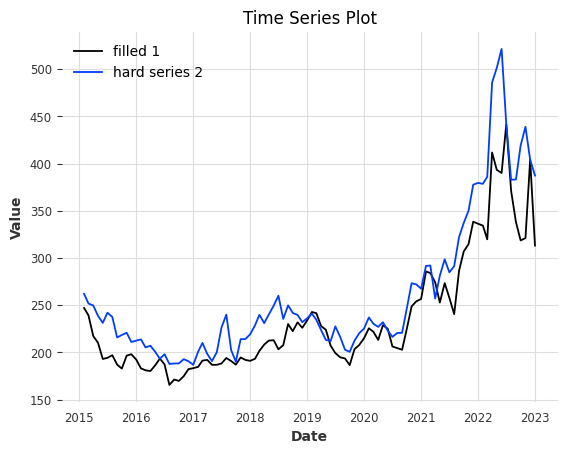

In [ ]:
# Filter the data for the desired time period
start_date = '2015-01-01'  # Specify the start date of the desired time period
end_date = '2022-12-31'    # Specify the end date of the desired time period

data1 = target_series_filled[(target_series_filled['period_date'] >= start_date) & (target_series_filled['period_date'] <= end_date)]
data2 = hard_series[(hard_series['period_date'] >= start_date) & (hard_series['period_date'] <= end_date)]

# Plot the time series data
plt.plot(data1['period_date'], data1['value'], label='filled 1')
plt.plot(data2['period_date'], data2['value'], label='hard series 2')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Plot')
plt.legend()

# Display the plot
plt.show()

The Augmented Dickey-Fuller test is a type of statistical test called a unit root test.

The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.

There are a number of unit root tests and the Augmented Dickey-Fuller may be one of the more widely used. It uses an autoregressive model and optimizes an information criterion across multiple different lag values.

The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure. Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure. We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary. p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [ ]:
result = adfuller(kabul_flour['common_unit_price'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.521399
p-value: 0.522900
Critical Values:
	1%: -3.458
	5%: -2.874
	10%: -2.573


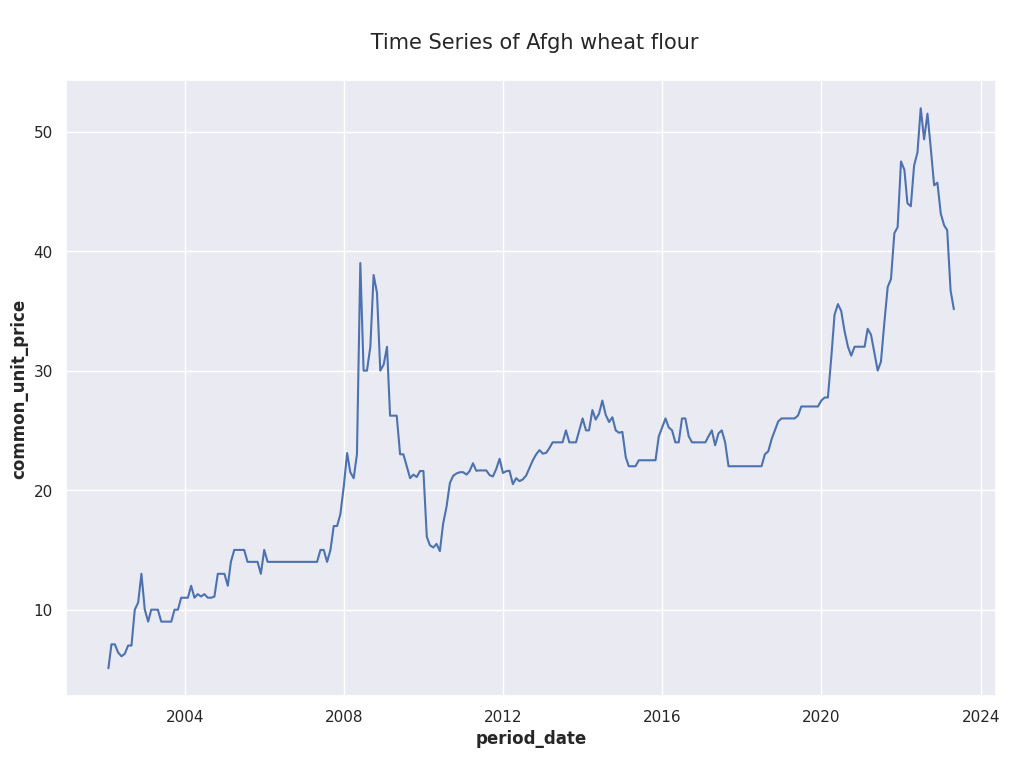

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
ax=sns.lineplot(data=kabul_flour,x='period_date',y='common_unit_price')
ax.axes.set_title("\n Time Series of Afgh wheat flour\n",fontsize=15);

In [ ]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


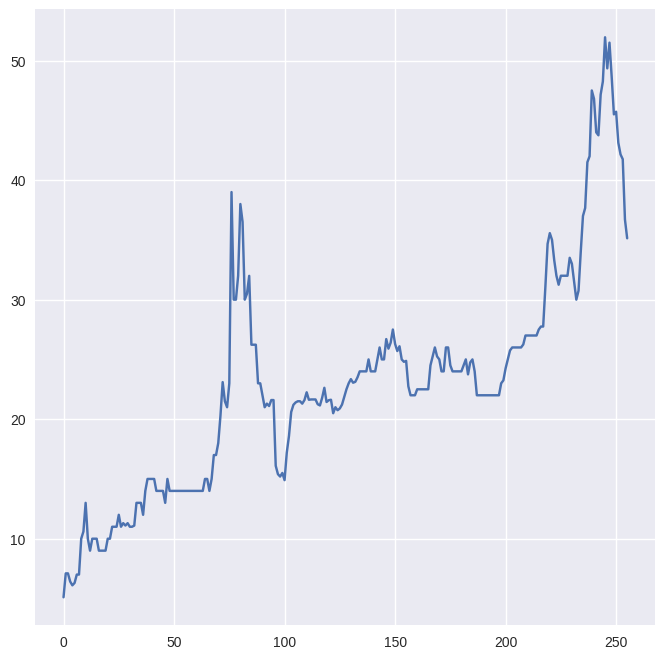

In [ ]:
plt.style.use('seaborn')
kabul_flour['common_unit_price'].plot(figsize=(8,8))
plt.show()

In [ ]:
hard_series['value'].isnull().value_counts()

False    279
Name: value, dtype: int64

In [ ]:
df1=kabul_flour.copy()
df1 = df1.set_index('period_date')

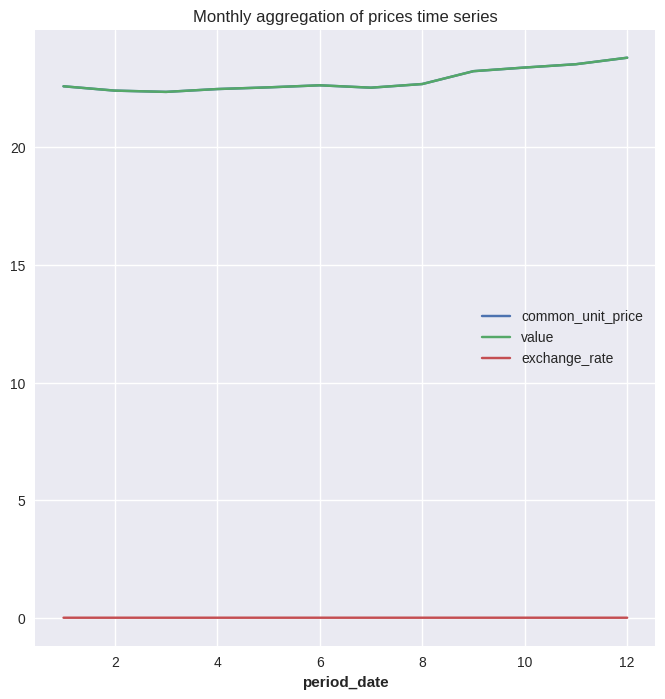

In [ ]:
# Plotting aggregate values of your time series
index_month= df1.index.month
df_monthly = df1.groupby(index_month).mean()
df_monthly.plot(figsize=(8,8))
plt.title('Monthly aggregation of prices time series')
plt.show()

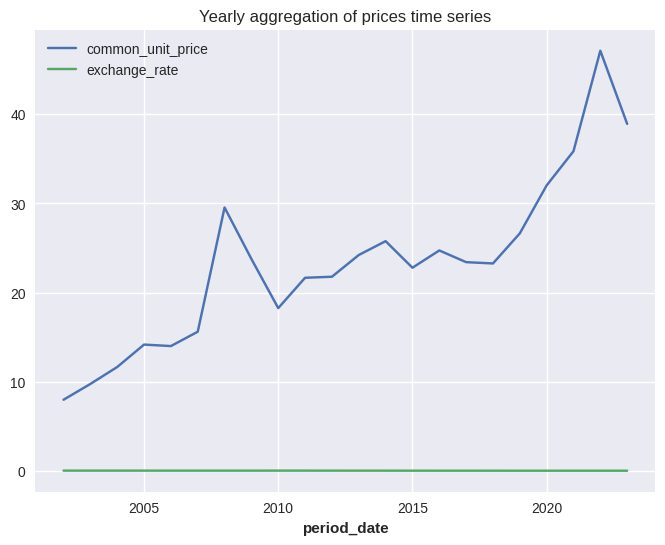

In [ ]:
# Plotting aggregate values of your time series
index_year = df1.index.year
df_yearly = df1.groupby(index_year).mean()
df_yearly.plot(figsize=(8,6))
plt.title('Yearly aggregation of prices time series')
plt.show()

In [ ]:
df1.describe()

,common_unit_price,exchange_rate
count,256.000000,256.000000
mean,22.830166,0.017528
std,9.378031,0.003476
min,5.100000,0.009634
25%,15.000000,0.014520
50%,22.500000,0.019140
75%,26.132500,0.020280
max,51.950000,0.022210


In [ ]:
df1.head()

,country,product,cpcv2,cpcv2_description,unit,common_unit_price,exchange_rate,dataseries_name
period_date,,,,,,,,
2002-01-31,Afghanistan,Wheat Flour (Low Quality),P23110AE,"Wheat and meslin flour, low quality",kg,5.10,0.021158,"Kabul, Afghanistan (Open Ended): P23110AE - Wh..."
2002-02-28,Afghanistan,Wheat Flour (Low Quality),P23110AE,"Wheat and meslin flour, low quality",kg,7.10,0.021158,"Kabul, Afghanistan (Open Ended): P23110AE - Wh..."
2002-03-31,Afghanistan,Wheat Flour (Low Quality),P23110AE,"Wheat and meslin flour, low quality",kg,7.10,0.021158,"Kabul, Afghanistan (Open Ended): P23110AE - Wh..."
2002-04-30,Afghanistan,Wheat Flour (Low Quality),P23110AE,"Wheat and meslin flour, low quality",kg,6.42,0.021158,"Kabul, Afghanistan (Open Ended): P23110AE - Wh..."
2002-05-31,Afghanistan,Wheat Flour (Low Quality),P23110AE,"Wheat and meslin flour, low quality",kg,6.10,0.021158,"Kabul, Afghanistan (Open Ended): P23110AE - Wh..."


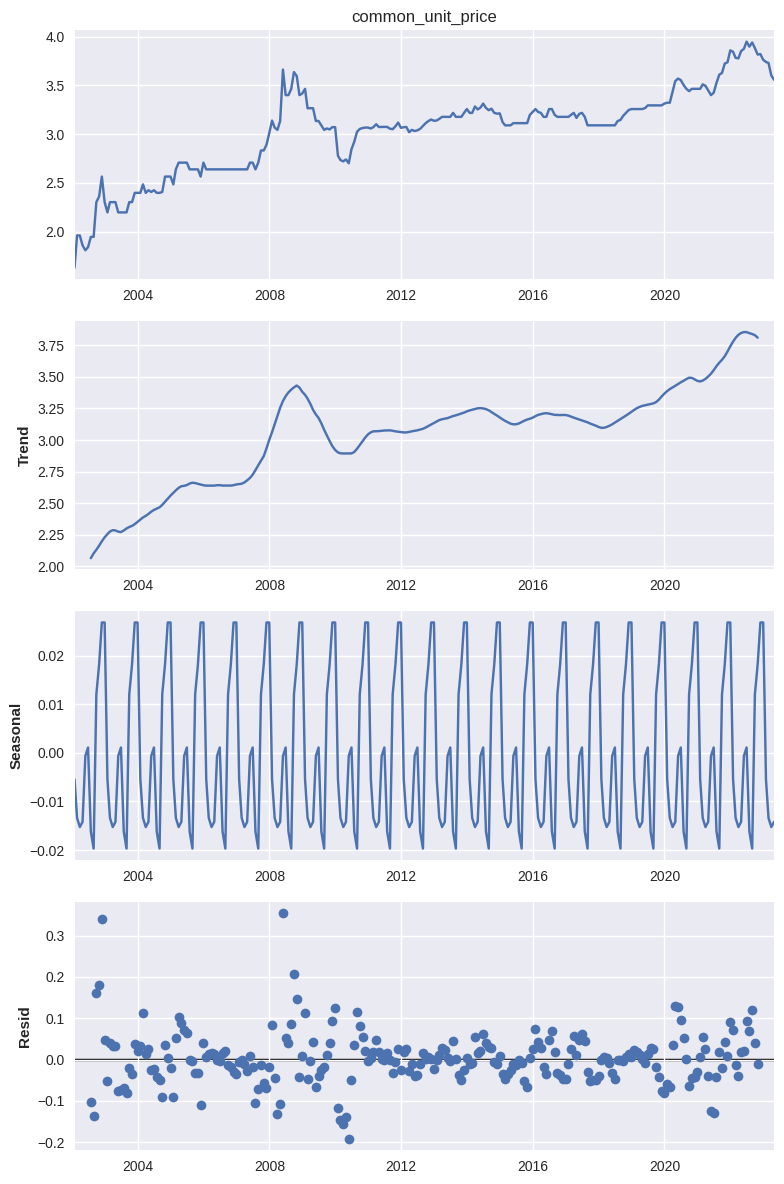

In [ ]:
#Time series decomposition 
rcParams['figure.figsize'] = 8, 12  # resizing the image to be big enough for us 

decomposition = sm.tsa.seasonal_decompose(np.log(df1['common_unit_price']))
fig = decomposition.plot()
# plt.savefig('wheat_decomposition.png',dpi=300)
plt.show()

In [ ]:
STL??

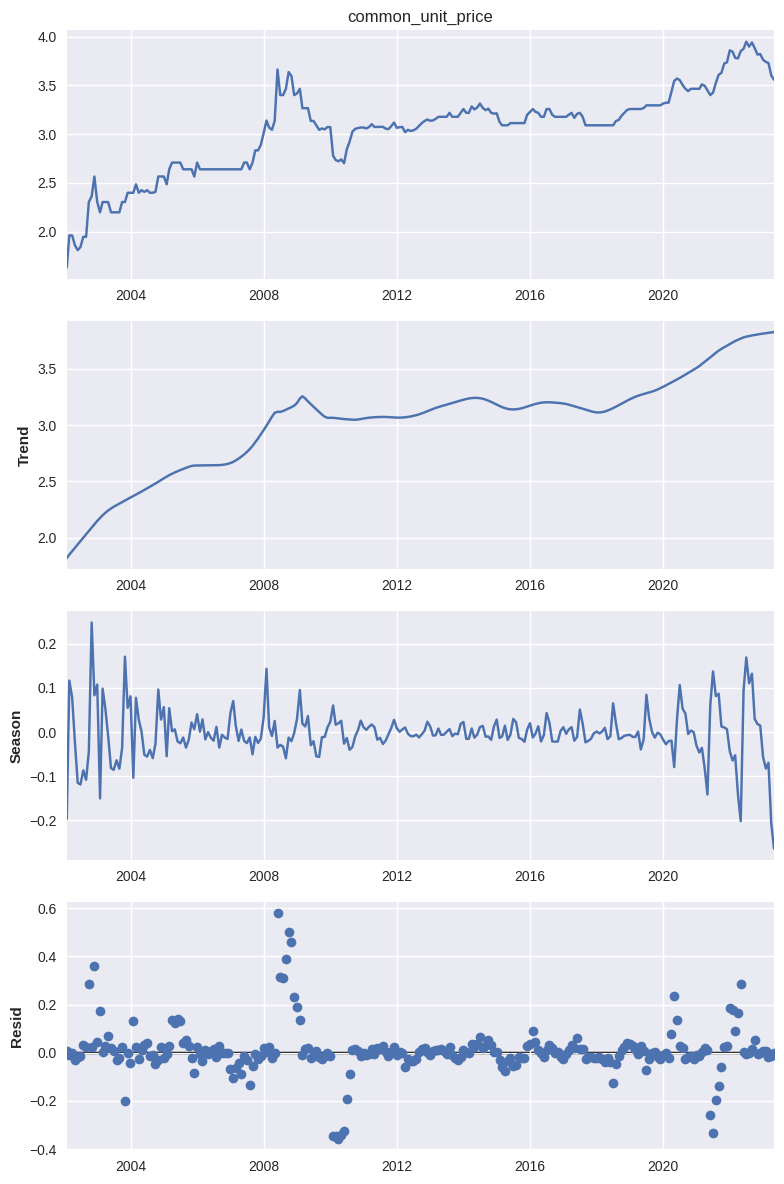

In [ ]:
res = STL(np.log(df1['common_unit_price']), robust = True).fit() 
res.plot() 
plt.show() 

## 3.1. Autocorrelation and Partial Autocorrelation

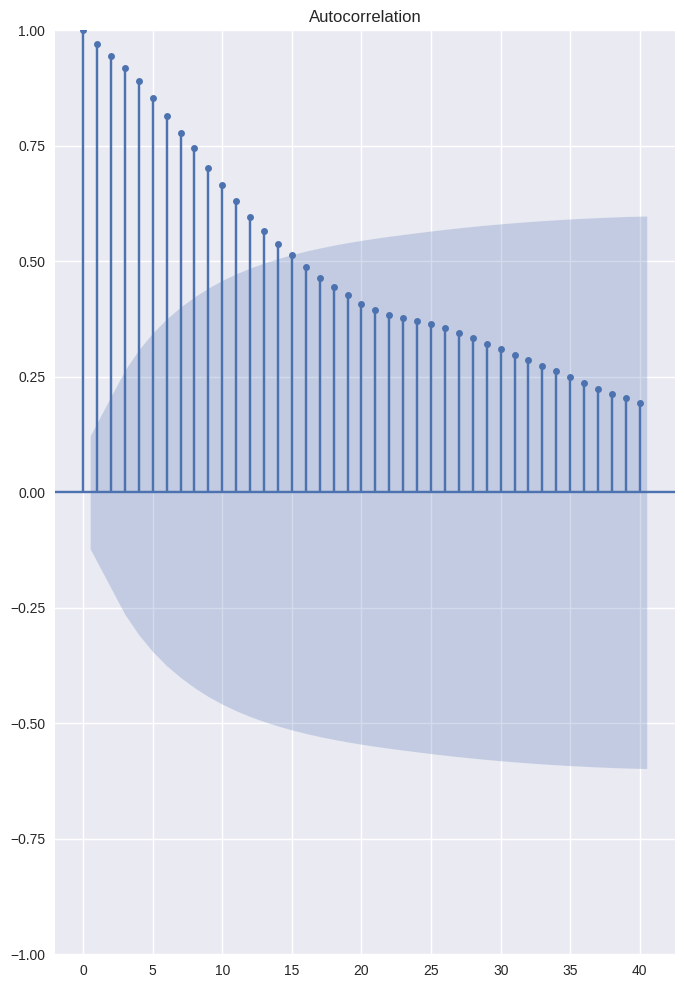

In [ ]:
# Plotting autocorrelations
fig = tsaplots.plot_acf(df1['common_unit_price'], lags=40)
plt.show()

<Axes: xlabel='period_date'>

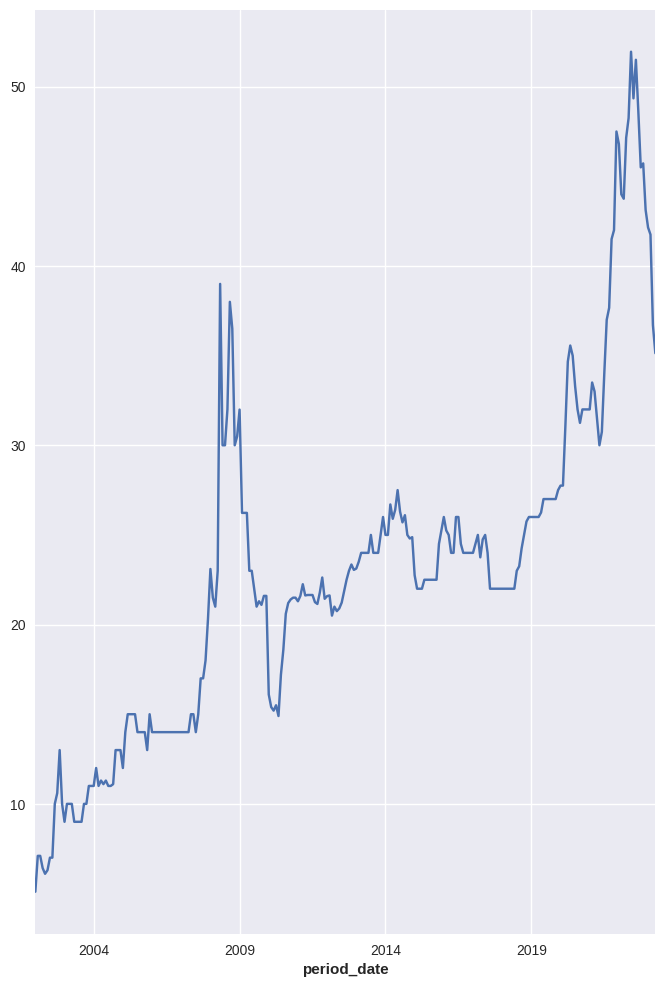

In [ ]:
df1['common_unit_price'].plot()

In [ ]:
kabul_grain = pd.read_csv('/content/kabul_wgrain.csv',parse_dates=['period_date'])
kabul_grain.head()

,country,product,cpcv2,cpcv2_description,period_date,unit,common_unit_price,value,exchange_rate,dataseries_name
0,Afghanistan,Wheat Grain,R01112AA,"Wheat grain, other",2003-09-30,kg,8.460,8.460,0.020334,"Kabul, Afghanistan (Open Ended): R01112AA - Wh..."
1,Afghanistan,Wheat Grain,R01112AA,"Wheat grain, other",2003-10-31,kg,8.125,8.125,0.020464,"Kabul, Afghanistan (Open Ended): R01112AA - Wh..."
2,Afghanistan,Wheat Grain,R01112AA,"Wheat grain, other",2003-11-30,kg,8.035,8.035,0.020512,"Kabul, Afghanistan (Open Ended): R01112AA - Wh..."
3,Afghanistan,Wheat Grain,R01112AA,"Wheat grain, other",2003-12-31,kg,8.375,8.375,0.020697,"Kabul, Afghanistan (Open Ended): R01112AA - Wh..."
4,Afghanistan,Wheat Grain,R01112AA,"Wheat grain, other",2004-01-31,kg,8.000,8.000,0.020404,"Kabul, Afghanistan (Open Ended): R01112AA - Wh..."


In [ ]:
kabul_grain.rename(columns={"common_unit_price":"wheat_grain","product":"wheat_product"},inplace=True)
kabul_grain.head()

,country,wheat_product,cpcv2,cpcv2_description,period_date,unit,wheat_grain,value,exchange_rate,dataseries_name
0,Afghanistan,Wheat Grain,R01112AA,"Wheat grain, other",2003-09-30,kg,8.460,8.460,0.020334,"Kabul, Afghanistan (Open Ended): R01112AA - Wh..."
1,Afghanistan,Wheat Grain,R01112AA,"Wheat grain, other",2003-10-31,kg,8.125,8.125,0.020464,"Kabul, Afghanistan (Open Ended): R01112AA - Wh..."
2,Afghanistan,Wheat Grain,R01112AA,"Wheat grain, other",2003-11-30,kg,8.035,8.035,0.020512,"Kabul, Afghanistan (Open Ended): R01112AA - Wh..."
3,Afghanistan,Wheat Grain,R01112AA,"Wheat grain, other",2003-12-31,kg,8.375,8.375,0.020697,"Kabul, Afghanistan (Open Ended): R01112AA - Wh..."
4,Afghanistan,Wheat Grain,R01112AA,"Wheat grain, other",2004-01-31,kg,8.000,8.000,0.020404,"Kabul, Afghanistan (Open Ended): R01112AA - Wh..."


In [ ]:
df_allwheat = pd.merge(kabul_grain[['wheat_product','period_date','wheat_grain']],kabul_flour[['product','period_date',"exchange_rate",'common_unit_price']],on=["period_date"],how='left')
df_allwheat.head()

,wheat_product,period_date,wheat_grain,product,exchange_rate,common_unit_price
0,Wheat Grain,2003-09-30,8.460,Wheat Flour (Low Quality),0.020334,10.0
1,Wheat Grain,2003-10-31,8.125,Wheat Flour (Low Quality),0.020464,10.0
2,Wheat Grain,2003-11-30,8.035,Wheat Flour (Low Quality),0.020512,11.0
3,Wheat Grain,2003-12-31,8.375,Wheat Flour (Low Quality),0.020697,11.0
4,Wheat Grain,2004-01-31,8.000,Wheat Flour (Low Quality),0.020404,11.0


In [ ]:
df_allwheat.columns

Index(['wheat_product', 'period_date', 'wheat_grain', 'product',
       'exchange_rate', 'common_unit_price'],
      dtype='object')

In [ ]:
cols=['common_unit_price','exchange_rate',"wheat_grain"]

Text(0.5, 1.0, 'Correlation of flour and wheat prices & exchange rate')

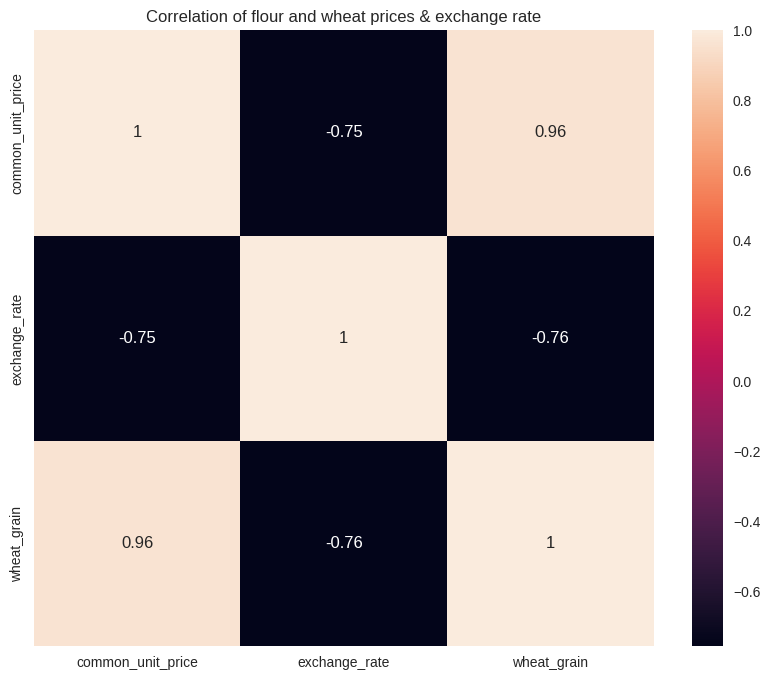

In [ ]:
# Calculate the correlation matrix for the selected variables
corr_matrix = df_allwheat[cols].corr()

# Create a correlation plot using seaborn's heatmap() function
fig, ax = plt.subplots(figsize=(10, 8)) # set the figure size
sns.heatmap(corr_matrix, annot=True)

# Add a title to the plot
plt.title('Correlation of flour and wheat prices & exchange rate')

In [ ]:
correlation, pvalue = spearmanr(df_allwheat['common_unit_price'], df_allwheat['exchange_rate'])
print('Spearman rank correlation coefficient:', correlation)
print('p-value:', pvalue) 

Spearman rank correlation coefficient: -0.8024522865381643
p-value: 2.193430881511091e-54


In [ ]:
correlation, pvalue = spearmanr(df_allwheat['common_unit_price'], df_allwheat['wheat_grain'])
print('Spearman rank correlation coefficient:', correlation)
print('p-value:', pvalue) 

Spearman rank correlation coefficient: 0.9506496259074753
p-value: 6.3768889609185635e-121


In [ ]:
pakistan = pd.read_csv("/content/wfp_food_prices_pak.csv")
pakistan.head() 

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,2004-01-15,BALOCHISTAN,Quetta,Quetta,30.187222,67.0125,cereals and tubers,"Rice (basmati, broken)",KG,actual,Retail,PKR,20.0,0.3487
2,2004-01-15,BALOCHISTAN,Quetta,Quetta,30.187222,67.0125,cereals and tubers,Wheat flour,KG,actual,Retail,PKR,13.0,0.2267
3,2004-01-15,KHYBER PAKHTUNKHWA,Peshawar,Peshawar,34.008366,71.580182,cereals and tubers,"Rice (basmati, broken)",KG,actual,Retail,PKR,17.59,0.3066
4,2004-01-15,KHYBER PAKHTUNKHWA,Peshawar,Peshawar,34.008366,71.580182,cereals and tubers,Wheat flour,KG,actual,Retail,PKR,12.0,0.2092


In [ ]:
pak_df = pakistan.iloc[1:]
pak_df.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
1,2004-01-15,BALOCHISTAN,Quetta,Quetta,30.187222,67.0125,cereals and tubers,"Rice (basmati, broken)",KG,actual,Retail,PKR,20.0,0.3487
2,2004-01-15,BALOCHISTAN,Quetta,Quetta,30.187222,67.0125,cereals and tubers,Wheat flour,KG,actual,Retail,PKR,13.0,0.2267
3,2004-01-15,KHYBER PAKHTUNKHWA,Peshawar,Peshawar,34.008366,71.580182,cereals and tubers,"Rice (basmati, broken)",KG,actual,Retail,PKR,17.59,0.3066
4,2004-01-15,KHYBER PAKHTUNKHWA,Peshawar,Peshawar,34.008366,71.580182,cereals and tubers,Wheat flour,KG,actual,Retail,PKR,12.0,0.2092
5,2004-01-15,PUNJAB,Lahore,Lahore,31.549722,74.343611,cereals and tubers,"Rice (basmati, broken)",KG,actual,Retail,PKR,19.15,0.3339


In [ ]:
pak_df = pak_df[pak_df['priceflag']=="actual"]
pak_df

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
1,2004-01-15,BALOCHISTAN,Quetta,Quetta,30.187222,67.0125,cereals and tubers,"Rice (basmati, broken)",KG,actual,Retail,PKR,20.0,0.3487
2,2004-01-15,BALOCHISTAN,Quetta,Quetta,30.187222,67.0125,cereals and tubers,Wheat flour,KG,actual,Retail,PKR,13.0,0.2267
3,2004-01-15,KHYBER PAKHTUNKHWA,Peshawar,Peshawar,34.008366,71.580182,cereals and tubers,"Rice (basmati, broken)",KG,actual,Retail,PKR,17.59,0.3066
4,2004-01-15,KHYBER PAKHTUNKHWA,Peshawar,Peshawar,34.008366,71.580182,cereals and tubers,Wheat flour,KG,actual,Retail,PKR,12.0,0.2092
5,2004-01-15,PUNJAB,Lahore,Lahore,31.549722,74.343611,cereals and tubers,"Rice (basmati, broken)",KG,actual,Retail,PKR,19.15,0.3339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10404,2023-03-15,SINDH,Karachi,Karachi,24.9056,67.0822,oil and fats,Ghee (artificial),KG,actual,Retail,PKR,633.92,2.2539
10405,2023-03-15,SINDH,Karachi,Karachi,24.9056,67.0822,oil and fats,Oil (cooking),L,actual,Retail,PKR,673.33,2.3941
10406,2023-03-15,SINDH,Karachi,Karachi,24.9056,67.0822,pulses and nuts,Beans(mash),KG,actual,Retail,PKR,439.6,1.563
10407,2023-03-15,SINDH,Karachi,Karachi,24.9056,67.0822,pulses and nuts,Lentils (masur),KG,actual,Retail,PKR,295.15,1.0494


In [ ]:
pak_df['commodity'].unique()

array(['Rice (basmati, broken)', 'Wheat flour', 'Rice (coarse)', 'Wheat',
       'Sugar', 'Ghee (artificial)', 'Oil (cooking)', 'Poultry', 'Eggs',
       'Wage (non-qualified labour, non-agricultural)', 'Lentils (masur)',
       'Fuel (diesel)', 'Beans(mash)', 'Milk', 'Salt',
       'Fuel (petrol-gasoline)', 'Lentils (moong)'], dtype=object)

In [ ]:
pak_wheat = pak_df[pak_df['commodity']=="Wheat flour"]
pak_wheat.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
2,2004-01-15,BALOCHISTAN,Quetta,Quetta,30.187222,67.0125,cereals and tubers,Wheat flour,KG,actual,Retail,PKR,13.0,0.2267
4,2004-01-15,KHYBER PAKHTUNKHWA,Peshawar,Peshawar,34.008366,71.580182,cereals and tubers,Wheat flour,KG,actual,Retail,PKR,12.0,0.2092
6,2004-01-15,PUNJAB,Lahore,Lahore,31.549722,74.343611,cereals and tubers,Wheat flour,KG,actual,Retail,PKR,11.75,0.2049
8,2004-01-15,PUNJAB,Multan,Multan,30.195556,71.475278,cereals and tubers,Wheat flour,KG,actual,Retail,PKR,12.0,0.2092
10,2004-01-15,SINDH,Karachi,Karachi,24.9056,67.0822,cereals and tubers,Wheat flour,KG,actual,Retail,PKR,14.01,0.2442


In [ ]:
pak_wheat_ = pak_wheat[pak_wheat['market']=="Peshawar"]
pak_wheat_ .head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
4,2004-01-15,KHYBER PAKHTUNKHWA,Peshawar,Peshawar,34.008366,71.580182,cereals and tubers,Wheat flour,KG,actual,Retail,PKR,12.0,0.2092
14,2004-02-15,KHYBER PAKHTUNKHWA,Peshawar,Peshawar,34.008366,71.580182,cereals and tubers,Wheat flour,KG,actual,Retail,PKR,12.21,0.2128
24,2004-03-15,KHYBER PAKHTUNKHWA,Peshawar,Peshawar,34.008366,71.580182,cereals and tubers,Wheat flour,KG,actual,Retail,PKR,12.5,0.2178
34,2004-04-15,KHYBER PAKHTUNKHWA,Peshawar,Peshawar,34.008366,71.580182,cereals and tubers,Wheat flour,KG,actual,Retail,PKR,12.0,0.2091
44,2004-05-15,KHYBER PAKHTUNKHWA,Peshawar,Peshawar,34.008366,71.580182,cereals and tubers,Wheat flour,KG,actual,Retail,PKR,12.07,0.2095


In [ ]:
pak_wheat_ = pak_wheat_[["date",'market',"commodity","price","usdprice"]]
pak_wheat_.head()

,date,market,commodity,price,usdprice
4,2004-01-15,Peshawar,Wheat flour,12.0,0.2092
14,2004-02-15,Peshawar,Wheat flour,12.21,0.2128
24,2004-03-15,Peshawar,Wheat flour,12.5,0.2178
34,2004-04-15,Peshawar,Wheat flour,12.0,0.2091
44,2004-05-15,Peshawar,Wheat flour,12.07,0.2095


In [ ]:
def convert_to_date(df):
    date_type = df['Date'].dtype
    if date_type == "period[M]":
        df['Date'] = df['Date'].dt.to_timestamp('d').dt.strftime('%Y-%m-%d')
        df['Date'] = pd.to_datetime(df['Date'].astype(str), errors='coerce')
        df['Date'] = df['Date'] + pd.offsets.MonthEnd(1)
    elif date_type == 'object':
        df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
pak_wheat_['Date'] = pak_wheat_['date']
convert_to_date(pak_wheat_)

In [ ]:
pak_wheat_.head()

,date,market,commodity,price,usdprice,Date
4,2004-01-15,Peshawar,Wheat flour,12.0,0.2092,2004-01-15
14,2004-02-15,Peshawar,Wheat flour,12.21,0.2128,2004-02-15
24,2004-03-15,Peshawar,Wheat flour,12.5,0.2178,2004-03-15
34,2004-04-15,Peshawar,Wheat flour,12.0,0.2091,2004-04-15
44,2004-05-15,Peshawar,Wheat flour,12.07,0.2095,2004-05-15


In [ ]:
# Extract year and month from df1's 'Date' column
pak_wheat_['Year'] = pak_wheat_['Date'].dt.year
pak_wheat_['Month'] = pak_wheat_['Date'].dt.month

# Create new 'Date' column in df1 with last day of the month
pak_wheat_['period_date'] = pd.to_datetime(pak_wheat_['Year'].astype(str) + '-' + pak_wheat_['Month'].astype(str) + '-' + '01') + pd.offsets.MonthEnd()


In [ ]:
pak_wheat_ = pak_wheat_[["period_date","market","commodity","price","usdprice"]]
pak_wheat_.dtypes 

period_date    datetime64[ns]
market                 object
commodity              object
price                  object
usdprice               object
dtype: object

In [ ]:
pak_wheat_.head()

,period_date,market,commodity,price,usdprice
4,2004-01-31,Peshawar,Wheat flour,12.0,0.2092
14,2004-02-29,Peshawar,Wheat flour,12.21,0.2128
24,2004-03-31,Peshawar,Wheat flour,12.5,0.2178
34,2004-04-30,Peshawar,Wheat flour,12.0,0.2091
44,2004-05-31,Peshawar,Wheat flour,12.07,0.2095


In [ ]:
pak_wheat_.dtypes

period_date    datetime64[ns]
market                 object
commodity              object
price                  object
usdprice               object
dtype: object

In [ ]:
# Convert 'Date' column to datetime format
pak_wheat_['period_date'] = pd.to_datetime(pak_wheat_['period_date'])

# Set 'Date' column as DataFrame index
# pak_wheat_.set_index('period_date', inplace=True)

# Generate a reference date range with monthly frequency
start_date = pak_wheat_['period_date'].min()
end_date = pak_wheat_['period_date'].max()
date_range = pd.date_range(start=start_date, end=end_date, freq='M')

# Find missing dates
missing_dates = date_range[~date_range.isin(pak_wheat_['period_date'])]

In [ ]:
# Create a DataFrame with missing dates
missing_df = pd.DataFrame({'period_date': missing_dates})

# Merge original DataFrame with missing dates DataFrame
merged_df = pd.merge(pak_wheat_, missing_df, on='period_date', how='outer')

# Sort DataFrame by date
merged_df.sort_values('period_date', inplace=True)

# Reset index
merged_df.reset_index(drop=True, inplace=True)

In [ ]:
merged_df.isnull().value_counts()

period_date  market  commodity  price  usdprice
False        False   False      False  False       226
             True    True       True   True          5
dtype: int64

In [ ]:
merged_df.dtypes

period_date    datetime64[ns]
market                 object
commodity              object
price                  object
usdprice               object
dtype: object

In [ ]:
merged_df[merged_df["price"].isnull()==True].index

Int64Index([62, 72, 109, 139, 198], dtype='int64')

In [ ]:
# Convert column 'A' from object to float64
merged_df['price'] = merged_df['price'].astype(float)

merged_df['usdprice'] = merged_df['usdprice'].astype(float)

merged_df.dtypes

period_date    datetime64[ns]
market                 object
commodity              object
price                 float64
usdprice              float64
dtype: object

In [ ]:
# Iterate over missing dates
for idx in merged_df[merged_df["price"].isnull()==True].index:
  merged_df['price'].loc[idx] = (merged_df.loc[idx-2:idx+3]['price'].sum())/5

for idx in merged_df[merged_df['usdprice'].isnull()==True].index:
  merged_df['usdprice'].loc[idx] = (merged_df.loc[idx-2:idx+3]['usdprice'].sum()) / 5


In [ ]:
merged_df.isnull().value_counts()

period_date  market  commodity  price  usdprice
False        False   False      False  False       226
             True    True       False  False         5
dtype: int64

In [ ]:
merged_df.columns

Index(['period_date', 'market', 'commodity', 'price', 'usdprice'], dtype='object')

In [ ]:
all_wheat_df = pd.merge(merged_df,df_allwheat,on=['period_date'],how='left')
all_wheat_df.head()

,period_date,market,commodity,price,usdprice,wheat_product,wheat_grain,product,exchange_rate,common_unit_price
0,2004-01-31,Peshawar,Wheat flour,12.00,0.2092,Wheat Grain,8.0,Wheat Flour (Low Quality),0.020404,11.0
1,2004-02-29,Peshawar,Wheat flour,12.21,0.2128,Wheat Grain,8.0,Wheat Flour (Low Quality),0.020217,12.0
2,2004-03-31,Peshawar,Wheat flour,12.50,0.2178,Wheat Grain,8.0,Wheat Flour (Low Quality),0.020021,11.0
3,2004-04-30,Peshawar,Wheat flour,12.00,0.2091,Wheat Grain,8.3,Wheat Flour (Low Quality),0.019923,11.3
4,2004-05-31,Peshawar,Wheat flour,12.07,0.2095,Wheat Grain,8.1,Wheat Flour (Low Quality),0.019965,11.1


In [ ]:
all_wheat_df.tail()

,period_date,market,commodity,price,usdprice,wheat_product,wheat_grain,product,exchange_rate,common_unit_price
226,2022-11-30,Peshawar,Wheat flour,86.84,0.3929,Wheat Grain,46.782500,Wheat Flour (Low Quality),0.011497,45.7225
227,2022-12-31,Peshawar,Wheat flour,104.32,0.4647,Wheat Grain,45.783571,Wheat Flour (Low Quality),0.011580,43.1250
228,2023-01-31,Peshawar,Wheat flour,131.41,0.5330,Wheat Grain,44.927500,Wheat Flour (Low Quality),0.011372,42.1500
229,2023-02-28,Peshawar,Wheat flour,100.18,0.3752,Wheat Grain,52.500000,Wheat Flour (Low Quality),0.011304,41.7500
230,2023-03-31,Peshawar,Wheat flour,112.95,0.4016,Wheat Grain,43.392857,Wheat Flour (Low Quality),0.011542,36.7000


In [ ]:
correlation, pvalue = spearmanr(all_wheat_df['common_unit_price'], all_wheat_df['price'])
print('Spearman rank correlation coefficient:', correlation)
print('p-value:', pvalue) 

Spearman rank correlation coefficient: 0.8639530338223104
p-value: 3.6024653210223215e-70


In [ ]:
correlation, pvalue = spearmanr(all_wheat_df['common_unit_price'], all_wheat_df['usdprice'])
print('Spearman rank correlation coefficient:', correlation)
print('p-value:', pvalue) 

Spearman rank correlation coefficient: 0.46256703371106545
p-value: 1.195664414405003e-13


In [ ]:
correlation, pvalue = spearmanr(all_wheat_df['usdprice'], all_wheat_df['price'])
print('Spearman rank correlation coefficient:', correlation)
print('p-value:', pvalue)

Spearman rank correlation coefficient: 0.46179669806747614
p-value: 1.3284132713811953e-13


In [ ]:
correlation, pvalue = spearmanr(all_wheat_df['exchange_rate'], all_wheat_df['common_unit_price'])
print('Spearman rank correlation coefficient:', correlation)
print('p-value:', pvalue) 

Spearman rank correlation coefficient: -0.7965723793226166
p-value: 5.835831533240226e-52


In [ ]:
all_wheat_df.columns

Index(['period_date', 'market', 'commodity', 'price', 'usdprice',
       'wheat_product', 'wheat_grain', 'product', 'exchange_rate',
       'common_unit_price'],
      dtype='object')

In [ ]:
all_wheat_df.tail()

,period_date,market,commodity,price,usdprice,wheat_product,wheat_grain,product,exchange_rate,common_unit_price
226,2022-11-30,Peshawar,Wheat flour,86.84,0.3929,Wheat Grain,46.782500,Wheat Flour (Low Quality),0.011497,45.7225
227,2022-12-31,Peshawar,Wheat flour,104.32,0.4647,Wheat Grain,45.783571,Wheat Flour (Low Quality),0.011580,43.1250
228,2023-01-31,Peshawar,Wheat flour,131.41,0.5330,Wheat Grain,44.927500,Wheat Flour (Low Quality),0.011372,42.1500
229,2023-02-28,Peshawar,Wheat flour,100.18,0.3752,Wheat Grain,52.500000,Wheat Flour (Low Quality),0.011304,41.7500
230,2023-03-31,Peshawar,Wheat flour,112.95,0.4016,Wheat Grain,43.392857,Wheat Flour (Low Quality),0.011542,36.7000


In [ ]:
all_wheat_df.isnull().value_counts()

period_date  market  commodity  price  usdprice  wheat_product  wheat_grain  product  exchange_rate  common_unit_price
False        False   False      False  False     False          False        False    False          False                226
             True    True       False  False     False          False        False    False          False                  5
dtype: int64

In [ ]:
all_wheat_df.dtypes

period_date          datetime64[ns]
market                       object
commodity                    object
price                       float64
usdprice                    float64
wheat_product                object
wheat_grain                 float64
product                      object
exchange_rate               float64
common_unit_price           float64
dtype: object

In [ ]:
# Convert column 'A' from object to float64
all_wheat_df['price'] = all_wheat_df['price'].astype(float)

all_wheat_df['usdprice'] = all_wheat_df['usdprice'].astype(float)

all_wheat_df.dtypes

period_date          datetime64[ns]
market                       object
commodity                    object
price                       float64
usdprice                    float64
wheat_product                object
wheat_grain                 float64
product                      object
exchange_rate               float64
common_unit_price           float64
dtype: object

In [ ]:
all_wheat_df.rename(columns={"period_date":"Date"},inplace=True)

In [ ]:
all_wheat_df.head(2)

,Date,market,commodity,price,usdprice,wheat_product,wheat_grain,product,exchange_rate,common_unit_price
0,2004-01-31,Peshawar,Wheat flour,12.00,0.2092,Wheat Grain,8.0,Wheat Flour (Low Quality),0.020404,11.0
1,2004-02-29,Peshawar,Wheat flour,12.21,0.2128,Wheat Grain,8.0,Wheat Flour (Low Quality),0.020217,12.0


In [ ]:
russian_data.head()

,country,product,cpcv2,cpcv2_description,Date,unit,common_unit_price,black_sea,exchange_rate,dataseries_name
0,Russian Federation,Wheat Grain,R01112AA,"Wheat grain, other",2000-01-31,t,0.096,96.0,1.0,"Black Sea States, Russian Federation (Open End..."
1,Russian Federation,Wheat Grain,R01112AA,"Wheat grain, other",2000-02-29,t,0.100,100.0,1.0,"Black Sea States, Russian Federation (Open End..."
2,Russian Federation,Wheat Grain,R01112AA,"Wheat grain, other",2000-03-31,t,0.100,100.0,1.0,"Black Sea States, Russian Federation (Open End..."
3,Russian Federation,Wheat Grain,R01112AA,"Wheat grain, other",2000-04-30,t,0.100,100.0,1.0,"Black Sea States, Russian Federation (Open End..."
4,Russian Federation,Wheat Grain,R01112AA,"Wheat grain, other",2000-05-31,t,0.100,100.0,1.0,"Black Sea States, Russian Federation (Open End..."


In [ ]:
target_series_filled.rename(columns={"period_date":"Date","value":"black_sea"},inplace=True)

In [ ]:
all_data = pd.merge(all_wheat_df,target_series_filled[['Date',"black_sea"]],on=['Date'],how='left')
all_data.head()

,Date,market,commodity,price,usdprice,wheat_product,wheat_grain,product,exchange_rate,common_unit_price,black_sea
0,2004-01-31,Peshawar,Wheat flour,12.00,0.2092,Wheat Grain,8.0,Wheat Flour (Low Quality),0.020404,11.0,170.25
1,2004-02-29,Peshawar,Wheat flour,12.21,0.2128,Wheat Grain,8.0,Wheat Flour (Low Quality),0.020217,12.0,164.75
2,2004-03-31,Peshawar,Wheat flour,12.50,0.2178,Wheat Grain,8.0,Wheat Flour (Low Quality),0.020021,11.0,170.60
3,2004-04-30,Peshawar,Wheat flour,12.00,0.2091,Wheat Grain,8.3,Wheat Flour (Low Quality),0.019923,11.3,171.75
4,2004-05-31,Peshawar,Wheat flour,12.07,0.2095,Wheat Grain,8.1,Wheat Flour (Low Quality),0.019965,11.1,166.75


In [ ]:
all_data.tail()

,Date,market,commodity,price,usdprice,wheat_product,wheat_grain,product,exchange_rate,common_unit_price,black_sea
226,2022-11-30,Peshawar,Wheat flour,86.84,0.3929,Wheat Grain,46.782500,Wheat Flour (Low Quality),0.011497,45.7225,404.092
227,2022-12-31,Peshawar,Wheat flour,104.32,0.4647,Wheat Grain,45.783571,Wheat Flour (Low Quality),0.011580,43.1250,313.090
228,2023-01-31,Peshawar,Wheat flour,131.41,0.5330,Wheat Grain,44.927500,Wheat Flour (Low Quality),0.011372,42.1500,309.180
229,2023-02-28,Peshawar,Wheat flour,100.18,0.3752,Wheat Grain,52.500000,Wheat Flour (Low Quality),0.011304,41.7500,303.150
230,2023-03-31,Peshawar,Wheat flour,112.95,0.4016,Wheat Grain,43.392857,Wheat Flour (Low Quality),0.011542,36.7000,284.570


In [ ]:
all_data.isnull().value_counts()

Date   market  commodity  price  usdprice  wheat_product  wheat_grain  product  exchange_rate  common_unit_price  black_sea
False  False   False      False  False     False          False        False    False          False              False        226
       True    True       False  False     False          False        False    False          False              False          5
dtype: int64

In [ ]:
correlation, pvalue = spearmanr(all_data['black_sea'], all_wheat_df['common_unit_price'])
print('Spearman rank correlation coefficient:', correlation)
print('p-value:', pvalue) 

Spearman rank correlation coefficient: 0.48272652860296816
p-value: 6.907456749999936e-15


In [ ]:
comtrade_data = pd.read_csv("/content/afghanistan_comtrade.csv",parse_dates=['period'])
comtrade_data.head()

,period,reporterCode,reporterDesc,flowCode,flowDesc,partnerCode,partnerDesc,partner2Code,partner2Desc,cmdCode,cmdDesc,primaryValue
0,2000-06-01,792,Türkiye,X,Export,-2,4,0,World,1101,Wheat or meslin flour,43000.000
1,2000-08-01,792,Türkiye,X,Export,-2,4,0,World,1101,Wheat or meslin flour,107500.000
2,2001-11-01,251,France,X,Export,-2,4,0,World,1001,Wheat and meslin,1544193.689
3,2002-02-01,251,France,X,Export,-2,4,0,World,1001,Wheat and meslin,256643.529
4,2002-02-01,251,France,X,Export,-2,4,0,World,1101,Wheat or meslin flour,138777.470


In [ ]:
comtrade_data.rename(columns={"period":"Date"},inplace=True)

In [ ]:
comtrade_data['Date'] = comtrade_data['Date'] + pd.offsets.MonthEnd(0)
comtrade_data.head()

,Date,reporterCode,reporterDesc,flowCode,flowDesc,partnerCode,partnerDesc,partner2Code,partner2Desc,cmdCode,cmdDesc,primaryValue
0,2000-06-30,792,Türkiye,X,Export,-2,4,0,World,1101,Wheat or meslin flour,43000.000
1,2000-08-31,792,Türkiye,X,Export,-2,4,0,World,1101,Wheat or meslin flour,107500.000
2,2001-11-30,251,France,X,Export,-2,4,0,World,1001,Wheat and meslin,1544193.689
3,2002-02-28,251,France,X,Export,-2,4,0,World,1001,Wheat and meslin,256643.529
4,2002-02-28,251,France,X,Export,-2,4,0,World,1101,Wheat or meslin flour,138777.470


In [ ]:
comtrade_data.tail()

,Date,reporterCode,reporterDesc,flowCode,flowDesc,partnerCode,partnerDesc,partner2Code,partner2Desc,cmdCode,cmdDesc,primaryValue
1100,2023-02-28,860,Uzbekistan,X,Export,-2,4,0,World,1101,Wheat or meslin flour,33723704.0
1101,2023-03-31,860,Uzbekistan,RX,Re-export,-2,4,0,World,1001,Wheat and meslin,1435089.0
1102,2023-03-31,860,Uzbekistan,RX,Re-export,-2,4,0,World,1101,Wheat or meslin flour,33112710.0
1103,2023-03-31,860,Uzbekistan,X,Export,-2,4,0,World,1001,Wheat and meslin,1435089.0
1104,2023-03-31,860,Uzbekistan,X,Export,-2,4,0,World,1101,Wheat or meslin flour,38506602.0


In [ ]:
comtrade_data['cmdDesc'].unique()

array(['Wheat or meslin flour', 'Wheat and meslin'], dtype=object)

In [ ]:
comdata_flour = comtrade_data[comtrade_data['cmdDesc']=="Wheat or meslin flour"]

In [ ]:
len(comdata_flour)

861

In [ ]:
comdata_flour.head(2)

,Date,reporterCode,reporterDesc,flowCode,flowDesc,partnerCode,partnerDesc,partner2Code,partner2Desc,cmdCode,cmdDesc,primaryValue
0,2000-06-30,792,Türkiye,X,Export,-2,4,0,World,1101,Wheat or meslin flour,43000.0
1,2000-08-31,792,Türkiye,X,Export,-2,4,0,World,1101,Wheat or meslin flour,107500.0


In [ ]:
start_date = comdata_flour['Date'].min()
end_date = comdata_flour['Date'].max()
date_range = pd.date_range(start=start_date, end=end_date, freq='M')

# Create a new DataFrame with the reference date range and unique countries
df_new = pd.DataFrame(index=date_range)
unique_countries = comdata_flour['reporterDesc'].unique()
for country in unique_countries:
    df_new[country] = 0

# Merge the new DataFrame with the original DataFrame based on 'date' and 'country' columns
df_merged_flour = pd.merge(df_new, comdata_flour[['Date','reporterDesc']], how='left', left_index=True, right_on=['Date'])

# df_merged = pd.merge(df_new, comtrade_data, how='left', left_index=True, right_on=['Date', 'reporterDesc'])

# Fill NaN values in the 'value' column with 0
df_merged_flour.fillna(0, inplace=True)


In [ ]:
df_merged_flour.head()

,Türkiye,France,Italy,Germany,Spain,Kazakhstan,Pakistan,United Arab Emirates,USA,Latvia,...,Russian Federation,Czechia,Lithuania,China,Uzbekistan,Finland,Qatar,Brazil,Date,reporterDesc
0.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2000-06-30,Türkiye
NaN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2000-07-31,0
1.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2000-08-31,Türkiye
NaN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2000-09-30,0
NaN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2000-10-31,0


In [ ]:
len(df_merged_flour)

891

In [ ]:
df_merged_flour.reset_index(drop=True, inplace=True)
df_merged_flour.head(2)

,Türkiye,France,Italy,Germany,Spain,Kazakhstan,Pakistan,United Arab Emirates,USA,Latvia,...,Russian Federation,Czechia,Lithuania,China,Uzbekistan,Finland,Qatar,Brazil,Date,reporterDesc
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2000-06-30,Türkiye
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2000-07-31,0


In [ ]:
df_merged_flour2 = df_merged_flour.iloc[0:,25:]

In [ ]:
df_merged_flour2['reporterDesc'].value_counts()

Pakistan                134
Kazakhstan              120
Türkiye                 115
Uzbekistan               95
France                   85
Netherlands              78
Germany                  61
United Arab Emirates     33
Spain                    33
Italy                    31
0                        30
Russian Federation       23
Latvia                   18
India                     7
Kyrgyzstan                6
China                     4
Czechia                   3
United Kingdom            3
USA                       3
Lithuania                 2
Qatar                     2
Azerbaijan                1
Canada                    1
Ukraine                   1
Finland                   1
Brazil                    1
Name: reporterDesc, dtype: int64

In [ ]:
df_merged_flour2.head()

,Date,reporterDesc
0,2000-06-30,Türkiye
1,2000-07-31,0
2,2000-08-31,Türkiye
3,2000-09-30,0
4,2000-10-31,0


In [ ]:
categorical_columns = ['reporterDesc']  # Specify the names of your categorical columns

df_encoded = pd.get_dummies(df_merged_flour2, columns=categorical_columns)


In [ ]:
df_encoded['reporterDesc_France'].value_counts()

0    806
1     85
Name: reporterDesc_France, dtype: int64

In [ ]:
df_encoded['Date'].nunique()

274

In [ ]:
comdata_flour['reporterDesc'].value_counts()

Pakistan                134
Kazakhstan              120
Türkiye                 115
Uzbekistan               95
France                   85
Netherlands              78
Germany                  61
Spain                    33
United Arab Emirates     33
Italy                    31
Russian Federation       23
Latvia                   18
India                     7
Kyrgyzstan                6
China                     4
Czechia                   3
United Kingdom            3
USA                       3
Lithuania                 2
Qatar                     2
Azerbaijan                1
Canada                    1
Ukraine                   1
Finland                   1
Brazil                    1
Name: reporterDesc, dtype: int64

In [ ]:
len(df_encoded)

891

In [ ]:
df_merged_flour2.head()

,Date,reporterDesc
0,2000-06-30,Türkiye
1,2000-07-31,0
2,2000-08-31,Türkiye
3,2000-09-30,0
4,2000-10-31,0


In [ ]:
df_encoded_flour2 = pd.get_dummies(df_merged_flour2.set_index('Date')['reporterDesc']).max(level=0)

In [ ]:
df_encoded_flour2.reset_index(inplace=True)

In [ ]:
df_encoded_flour2.columns

Index([                'Date',                      0,           'Azerbaijan',
                     'Brazil',               'Canada',                'China',
                    'Czechia',              'Finland',               'France',
                    'Germany',                'India',                'Italy',
                 'Kazakhstan',           'Kyrgyzstan',               'Latvia',
                  'Lithuania',          'Netherlands',             'Pakistan',
                      'Qatar',   'Russian Federation',                'Spain',
                    'Türkiye',                  'USA',              'Ukraine',
       'United Arab Emirates',       'United Kingdom',           'Uzbekistan'],
      dtype='object')

In [ ]:
df_encoded_flour2.head(2)

,Date,0,Azerbaijan,Brazil,Canada,China,Czechia,Finland,France,Germany,...,Pakistan,Qatar,Russian Federation,Spain,Türkiye,USA,Ukraine,United Arab Emirates,United Kingdom,Uzbekistan
0,2000-06-30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2000-07-31,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_encoded_flour2['Date'].nunique()

274

In [ ]:
df_encoded_flour2 = df_encoded_flour2[df_encoded_flour2['Date']>=merged_df['period_date'].min()]

In [ ]:
comtrade_series = TimeSeries.from_dataframe(df_encoded_flour2,
                                           time_col="Date")

### Comtrade Grain

In [ ]:
comtrade_data['cmdDesc'].unique()

array(['Wheat or meslin flour', 'Wheat and meslin'], dtype=object)

In [ ]:
comdata_grain = comtrade_data[comtrade_data['cmdDesc']=="Wheat and meslin"]

In [ ]:
comdata_grain.head(2)

,Date,reporterCode,reporterDesc,flowCode,flowDesc,partnerCode,partnerDesc,partner2Code,partner2Desc,cmdCode,cmdDesc,primaryValue
2,2001-11-30,251,France,X,Export,-2,4,0,World,1001,Wheat and meslin,1544193.689
3,2002-02-28,251,France,X,Export,-2,4,0,World,1001,Wheat and meslin,256643.529


In [ ]:
start_date = comdata_grain['Date'].min()
end_date = comdata_grain['Date'].max()
date_range = pd.date_range(start=start_date, end=end_date, freq='M')

# Create a new DataFrame with the reference date range and unique countries
df_new = pd.DataFrame(index=date_range)
unique_countries = comdata_grain['reporterDesc'].unique()
for country in unique_countries:
    df_new[country] = 0

# Merge the new DataFrame with the original DataFrame based on 'date' and 'country' columns
df_merged_grain = pd.merge(df_new, comdata_grain[['Date','reporterDesc']], how='left', left_index=True, right_on=['Date'])

# df_merged = pd.merge(df_new, comtrade_data, how='left', left_index=True, right_on=['Date', 'reporterDesc'])

# Fill NaN values in the 'value' column with 0
df_merged_grain.fillna(0, inplace=True)


In [ ]:
df_merged_grain.head(3)

,France,Türkiye,Kazakhstan,Pakistan,USA,Italy,India,Russian Federation,Uzbekistan,United Arab Emirates,China,Date,reporterDesc
2.0,0,0,0,0,0,0,0,0,0,0,0,2001-11-30,France
NaN,0,0,0,0,0,0,0,0,0,0,0,2001-12-31,0
NaN,0,0,0,0,0,0,0,0,0,0,0,2002-01-31,0


In [ ]:
len(df_merged_grain)

351

In [ ]:
df_merged_grain.reset_index(drop=True, inplace=True)
df_merged_grain.head(2)

,France,Türkiye,Kazakhstan,Pakistan,USA,Italy,India,Russian Federation,Uzbekistan,United Arab Emirates,China,Date,reporterDesc
0,0,0,0,0,0,0,0,0,0,0,0,2001-11-30,France
1,0,0,0,0,0,0,0,0,0,0,0,2001-12-31,0


In [ ]:
df_merged_grain2 = df_merged_grain.iloc[0:,-2:]

In [ ]:
df_merged_grain2.head()

,Date,reporterDesc
0,2001-11-30,France
1,2001-12-31,0
2,2002-01-31,0
3,2002-02-28,France
4,2002-03-31,0


In [ ]:
df_merged_grain2['reporterDesc'].value_counts()

0                       107
Kazakhstan               94
Pakistan                 59
Uzbekistan               29
India                    28
France                   12
USA                       6
Türkiye                   5
Russian Federation        5
China                     3
United Arab Emirates      2
Italy                     1
Name: reporterDesc, dtype: int64

In [ ]:
df_merged_grain2.head()

,Date,reporterDesc
0,2001-11-30,France
1,2001-12-31,0
2,2002-01-31,0
3,2002-02-28,France
4,2002-03-31,0


In [ ]:
categorical_columns = ['reporterDesc']  # Specify the names of your categorical columns

df_encoded_grain = pd.get_dummies(df_merged_grain2, columns=categorical_columns)


In [ ]:
df_encoded_grain['reporterDesc_France'].value_counts()

0    339
1     12
Name: reporterDesc_France, dtype: int64

In [ ]:
df_encoded_grain['Date'].nunique()

257

In [ ]:
comdata_grain['reporterDesc'].value_counts()

Kazakhstan              94
Pakistan                59
Uzbekistan              29
India                   28
France                  12
USA                      6
Türkiye                  5
Russian Federation       5
China                    3
United Arab Emirates     2
Italy                    1
Name: reporterDesc, dtype: int64

In [ ]:
len(df_encoded_grain)

351

In [ ]:
df_merged_grain2.head()

,Date,reporterDesc
0,2001-11-30,France
1,2001-12-31,0
2,2002-01-31,0
3,2002-02-28,France
4,2002-03-31,0


In [ ]:
df_encoded_grain2 = pd.get_dummies(df_merged_grain2.set_index('Date')['reporterDesc']).max(level=0)

In [ ]:
df_encoded_grain2.reset_index(inplace=True)

In [ ]:
df_encoded_grain2.columns

Index([                'Date',                      0,                'China',
                     'France',                'India',                'Italy',
                 'Kazakhstan',             'Pakistan',   'Russian Federation',
                    'Türkiye',                  'USA', 'United Arab Emirates',
                 'Uzbekistan'],
      dtype='object')

In [ ]:
df_encoded_flour2['Date'].nunique()

274

In [ ]:
df_encoded_grain2.head(2)

,Date,0,China,France,India,Italy,Kazakhstan,Pakistan,Russian Federation,Türkiye,USA,United Arab Emirates,Uzbekistan
0,2001-11-30,0,0,1,0,0,0,0,0,0,0,0,0
1,2001-12-31,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
merged_df.head(2)

,period_date,market,commodity,price,usdprice
0,2004-01-31,Peshawar,Wheat flour,12.00,0.2092
1,2004-02-29,Peshawar,Wheat flour,12.21,0.2128


In [ ]:
merged_df['period_date'].min()

Timestamp('2004-01-31 00:00:00')

In [ ]:
df_encoded_grain2 = df_encoded_grain2[df_encoded_grain2['Date']>=merged_df['period_date'].min()]

In [ ]:
df_encoded_grain2.columns

Index([                'Date',                      0,                'China',
                     'France',                'India',                'Italy',
                 'Kazakhstan',             'Pakistan',   'Russian Federation',
                    'Türkiye',                  'USA', 'United Arab Emirates',
                 'Uzbekistan'],
      dtype='object')

In [ ]:
df_encoded_grain2[0].value_counts()

0    146
1     85
Name: 0, dtype: int64

In [ ]:
df_encoded_grain2.rename(columns={0:"1"},inplace=True)

In [ ]:
comtrade_grain_series = TimeSeries.from_dataframe(df_encoded_grain2,
                                           time_col="Date")

In [ ]:
len(df_encoded_flour2)

231

In [ ]:
all_wheat_df.head(2)

,Date,market,commodity,price,usdprice,wheat_product,wheat_grain,product,exchange_rate,common_unit_price
0,2004-01-31,Peshawar,Wheat flour,12.00,0.2092,Wheat Grain,8.0,Wheat Flour (Low Quality),0.020404,11.0
1,2004-02-29,Peshawar,Wheat flour,12.21,0.2128,Wheat Grain,8.0,Wheat Flour (Low Quality),0.020217,12.0


In [ ]:
target_series_filled.head(2)

,country,product,cpcv2,cpcv2_description,Date,unit,common_unit_price,black_sea,exchange_rate,dataseries_name
0,Russian Federation,Wheat Grain,R01112AA,"Wheat grain, other",2000-01-31,t,0.096,96.0,1.0,"Black Sea States, Russian Federation (Open End..."
1,Russian Federation,Wheat Grain,R01112AA,"Wheat grain, other",2000-02-29,t,0.100,100.0,1.0,"Black Sea States, Russian Federation (Open End..."


In [ ]:
all_data = pd.merge(all_wheat_df,target_series_filled[['Date',"black_sea"]],on=['Date'],how='left')
all_data.head()

,Date,market,commodity,price,usdprice,wheat_product,wheat_grain,product,exchange_rate,common_unit_price,black_sea
0,2004-01-31,Peshawar,Wheat flour,12.00,0.2092,Wheat Grain,8.0,Wheat Flour (Low Quality),0.020404,11.0,170.25
1,2004-02-29,Peshawar,Wheat flour,12.21,0.2128,Wheat Grain,8.0,Wheat Flour (Low Quality),0.020217,12.0,164.75
2,2004-03-31,Peshawar,Wheat flour,12.50,0.2178,Wheat Grain,8.0,Wheat Flour (Low Quality),0.020021,11.0,170.60
3,2004-04-30,Peshawar,Wheat flour,12.00,0.2091,Wheat Grain,8.3,Wheat Flour (Low Quality),0.019923,11.3,171.75
4,2004-05-31,Peshawar,Wheat flour,12.07,0.2095,Wheat Grain,8.1,Wheat Flour (Low Quality),0.019965,11.1,166.75


In [ ]:
series = TimeSeries.from_dataframe(all_data,
                                   time_col='Date',
                                   value_cols=['price', 'usdprice', 'wheat_grain', 'exchange_rate','common_unit_price','black_sea']
                                   )

In [ ]:
six_months = all_wheat_df['Date'].max() + relativedelta(months=-6)
data_series = series['common_unit_price']
train, val = data_series.split_after(six_months)
transformer = Scaler()
train_transformed = transformer.fit_transform(train)
val_transformed = transformer.transform(val)
series_transformed = transformer.transform(data_series)

# create year, month and integer index covariate series
covariates = datetime_attribute_timeseries(series_transformed, attribute="year", one_hot=False)
covariates = covariates.stack(
    datetime_attribute_timeseries(series_transformed, attribute="month", one_hot=True)
)
covariates = covariates.stack(
    TimeSeries.from_times_and_values(
        times=series_transformed.time_index,
        values=np.arange(len(series_transformed)),
    )
)
covariates = covariates.add_holidays(country_code="ES")

covariates = covariates.astype(np.float32)

scaler_covs = Scaler()
cov_train, cov_val = covariates.split_after(six_months)
cov_train = scaler_covs.fit_transform(cov_train)
cov_val = scaler_covs.transform(cov_val)
covariates_transformed = scaler_covs.transform(covariates)


grain_series = series['wheat_grain']
grain_scaler = Scaler()
grain_train, grain_val = grain_series.split_after(six_months)
grain_train = grain_scaler.fit_transform(grain_train)
grain_val = grain_scaler.transform(grain_val)
grain_series_scaled = grain_scaler.transform(grain_series)

pakistan_series = series["price"]
pakistan_scaler = Scaler()
pakistan_train, pakistan_val = pakistan_series.split_after(six_months)
pakistan_train = pakistan_scaler.fit_transform(pakistan_train)
pakistan_val = pakistan_scaler.transform(pakistan_val)
pakistan_series_scaled = pakistan_scaler.transform(pakistan_series)

usd_series = series['usdprice']
usd_scaler = Scaler()
usd_train, usd_val = usd_series.split_after(six_months)
usd_train = usd_scaler.fit_transform(usd_train)
usd_val = usd_scaler.transform(usd_val)
usd_series_scaled = usd_scaler.transform(usd_series)

erate_series = series['exchange_rate']
erate_scaler = Scaler()
erate_train, erate_val = erate_series.split_after(six_months)
erate_train_transformed = erate_scaler.fit_transform(erate_train)
erate_val_transformed = erate_scaler.transform(erate_val)
erate_series_scaled = erate_scaler.transform(erate_series)

# russian_series = series['russian_value']
# russian_scaler = Scaler()
# russian_train, russian_val = russian_series.split_after(six_months)
# russian_train_transformed = russian_scaler.fit_transform(russian_train)
# russian_val_transformed  = russian_scaler.transform(russian_val)
# russian_series_scaled = russian_scaler.transform(russian_series)

black_sea = series['black_sea']
black_sea_scaler = Scaler()
black_train,black_val = black_sea.split_after(six_months)
black_train_transformed = black_sea_scaler.fit_transform(black_train)
black_val_transformed = black_sea_scaler.transform(black_val)
black_sea_series = black_sea_scaler.transform(black_sea)


In [ ]:
from darts import concatenate
my_multivariate_series = concatenate(
    [
    grain_series_scaled,
    pakistan_series_scaled,
    # usd_series_scaled,     
    erate_series_scaled,
    black_sea_series,
     comtrade_series,
     comtrade_grain_series,
    covariates_transformed,
     
     ],
    axis=1)


multivariate_series_train = concatenate(
    [
    grain_train,
    pakistan_train,
    # usd_train,
    erate_train,
    #russian_train_transformed,
    #  black_train_transformed,
    cov_train,
     ],
    axis=1)

In [ ]:
print(check_seasonality(series["common_unit_price"], max_lag=48))

(False, 0)


In [ ]:
print(check_seasonality(series["price"], max_lag=48))

(True, 12)


In [ ]:
print(check_seasonality(series["usdprice"], max_lag=48))

(False, 0)


In [ ]:
print(check_seasonality(series["exchange_rate"], max_lag=48))

(False, 0)


In [ ]:
print(check_seasonality(series["wheat_grain"], max_lag=48))

(False, 0)


In [ ]:
print(check_seasonality(series['russian_value'],max_lag=48))

(False, 0)


In [ ]:
from google.colab import drive

drive.mount("/content/gdrive_drive")

Mounted at /content/gdrive_drive


In [ ]:
work_dir = "/content/gdrive_drive/MyDrive/TIME_SERIES"

In [ ]:
# default quantiles for QuantileRegression
quantiles = [
    0.01, 0.05,0.1,0.15,0.2,
    0.25,0.3,0.4,0.5,0.6,0.7,0.75,
    0.8,0.85,0.9,0.95,0.99,]
    
input_chunk_length = 36
forecast_horizon = 6
afgh_model_full = TFTModel(
    input_chunk_length=input_chunk_length,
    output_chunk_length=forecast_horizon,
    hidden_size=64,
    lstm_layers=1,
    num_attention_heads=4,
    dropout=0.1,
    hidden_continuous_size=160,
    optimizer_kwargs={"lr": 1e-3},
    batch_size=24,
    n_epochs=200,
    nr_epochs_val_period=1,
    add_encoders={'cyclic': {'future': ['month']}},
    likelihood=QuantileRegression(
        quantiles=quantiles
    ),  
    random_state=42,
    force_reset=True,
    log_tensorboard=False,
    model_name = "Afghan_w_blacksea_allcomtrade_jun06",
)

In [ ]:
afgh_model_full.fit(series_transformed,
             past_covariates=my_multivariate_series,
             verbose=True)

Training: 0it [00:00, ?it/s]

TFTModel(hidden_size=64, lstm_layers=1, num_attention_heads=4, full_attention=False, feed_forward=GatedResidualNetwork, dropout=0.1, hidden_continuous_size=160, categorical_embedding_sizes=None, add_relative_index=False, loss_fn=None, likelihood=<darts.utils.likelihood_models.QuantileRegression object at 0x7f1b25f8cb80>, norm_type=LayerNorm, use_static_covariates=True, input_chunk_length=36, output_chunk_length=6, optimizer_kwargs={'lr': 0.001}, batch_size=24, n_epochs=200, nr_epochs_val_period=1, add_encoders={'cyclic': {'future': ['month']}}, random_state=42, force_reset=True, log_tensorboard=False, model_name=Afghan_w_blacksea_allcomtrade_jun06)

In [ ]:
my_multivariate_series.head()

<TimeSeries (DataArray) (Date: 5, component: 57, sample: 1)>
array([[[0.        ],
        [0.        ],
        [0.85640903],
        [0.16666667],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [1.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
...
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [1.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.01785714],
        [0.        ]]])
Coordinates:
  * Date       (Date) datetime64[ns] 2004-01-31 2004-02-29 ... 2004-05-31
  * component  (component) <U22 'wheat_grain' 'price' ... '0_1' 'holidays'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [ ]:
figsize = (9, 6)
lowest_q, low_q, high_q, highest_q = 0.01, 0.1, 0.9, 0.99
label_q_outer = f"{int(lowest_q * 100)}-{int(highest_q * 100)}th percentiles"
label_q_inner = f"{int(low_q * 100)}-{int(high_q * 100)}th percentiles"

In [ ]:
def eval_model(model, n, actual_series, val_series):
    num_samples = 20
    pred_series = model.predict(n=n, num_samples=num_samples)

    # plot actual series
    plt.figure(figsize=figsize)
    actual_series[: pred_series.end_time()].plot(label="actual")

    # plot prediction with quantile ranges
    pred_series.plot(
        low_quantile=lowest_q, high_quantile=highest_q, label=label_q_outer
    )
    pred_series.plot(low_quantile=low_q, high_quantile=high_q, label=label_q_inner)

    plt.title("MAE: {:.2f}".format(mae(val_series, pred_series)))
    plt.legend()

Predicting: 0it [00:00, ?it/s]

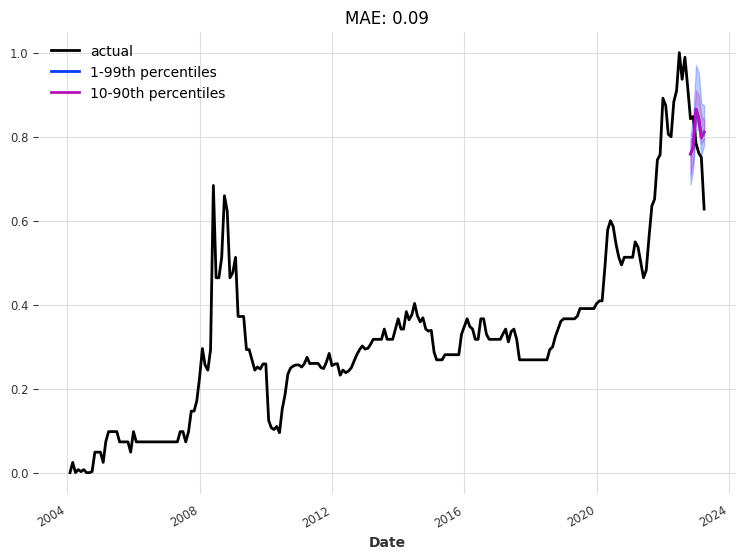

In [ ]:
eval_model(afgh_model_full, 6, series_transformed, val_transformed)

In [ ]:
start_ = pd.Timestamp("20180131")

In [ ]:
backtest_series_all = afgh_model_full.historical_forecasts(
    series_transformed,
    past_covariates=my_multivariate_series,
    start=start_,
    forecast_horizon=6,
    retrain=False,
    verbose=False,
)

Text(0.5, 1.0, 'Backtest, starting 2018-01-31, 6-months horizon')

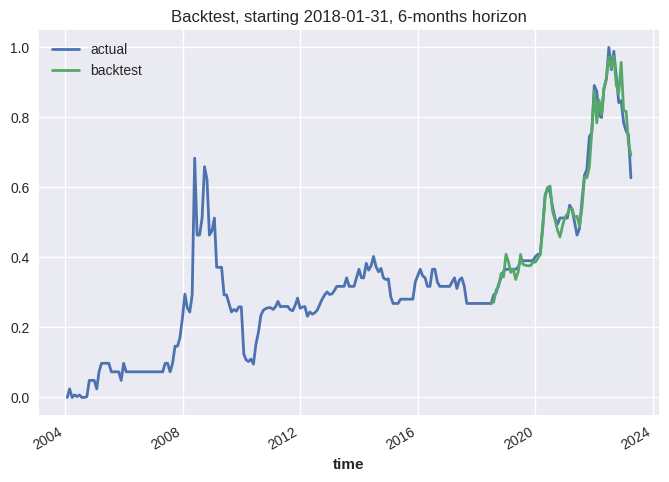

In [ ]:
plt.figure(figsize=(8, 5))
series_transformed.plot(label="actual")
backtest_series_all.plot(label="backtest",low_quantile=lowest_q, high_quantile=highest_q,)
plt.legend()
plt.title(f"Backtest, starting {start_.date()}, 6-months horizon")

In [ ]:
print(
    "mae: {:.2f}".format(
        mae(
            transformer.inverse_transform(series_transformed),
            transformer.inverse_transform(backtest_series_all),
        )
    )
)

mae: 0.86


In [ ]:
print(
    "MAPE: {:.2f}".format(
        mape(
            transformer.inverse_transform(series_transformed),
            transformer.inverse_transform(backtest_series_all),
        )
    )
)

MAPE: 2.43


In [ ]:
afgh_model_full

TFTModel(hidden_size=64, lstm_layers=1, num_attention_heads=4, full_attention=False, feed_forward=GatedResidualNetwork, dropout=0.1, hidden_continuous_size=160, categorical_embedding_sizes=None, add_relative_index=False, loss_fn=None, likelihood=<darts.utils.likelihood_models.QuantileRegression object at 0x7f1b25f8cb80>, norm_type=LayerNorm, use_static_covariates=True, input_chunk_length=36, output_chunk_length=6, optimizer_kwargs={'lr': 0.001}, batch_size=24, n_epochs=200, nr_epochs_val_period=1, add_encoders={'cyclic': {'future': ['month']}}, random_state=42, force_reset=True, log_tensorboard=False, model_name=Afghan_w_blacksea_allcomtrade_jun06)

In [ ]:
afgh_model_full.save("/content/gdrive_drive/MyDrive/TIME_SERIES/Afghan/Afghan_w_blacksea_allcomtrade_jun06.pt")

In [ ]:
import torch

In [ ]:
# !pip show torch

In [ ]:
afgh_model = TFTModel.load("/content/gdrive_drive/MyDrive/TIME_SERIES/Afghan/Afghan_w_blacksea_allcomtrade_jun06.pt",map_location=torch.device('cpu'))

In [ ]:
afgh_wheat_fl = afgh_model.predict(n=6,num_samples=1);

Predicting: 0it [00:00, ?it/s]

In [ ]:
afgh_wheat_fl 

<TimeSeries (DataArray) (Date: 6, component: 1, sample: 1)>
array([[[0.54792201]],

       [[0.56336978]],

       [[0.54968169]],

       [[0.62769001]],

       [[0.6452843 ]],

       [[0.66336988]]])
Coordinates:
  * Date       (Date) datetime64[ns] 2023-04-30 2023-05-31 ... 2023-09-30
  * component  (component) object 'common_unit_price'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

## Gradio visual

In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 77.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.1/288.1 kB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 9.0 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4694 sha256=47ce2383db97b2a95870a5058949356cace1f21f219ec735cccea8724eb6f0d5
  Stored in directory: /root/.cache/pip/wheels/0c/c2/0e/3b9c6845c6a4e35beb90910cc70d9ac9ab5d47402bd62af0df
Successfully built ffmpy


In [ ]:
import gradio as gr
from typing import Any, List, Optional
import plotly.graph_objects as go

In [ ]:
class FlaggingHandler(gr.FlaggingCallback):
    def __init__(self):
        self._csv_logger = gr.CSVLogger()

    def setup(self, components: List[gr.components.Component], flagging_dir: str):
        """Called by Gradio at the beginning of the `Interface.launch()` method.
        Parameters:
        components: Set of components that will provide flagged data.
        flagging_dir: A string, typically containing the path to the directory where
        the flagging file should be storied (provided as an argument to Interface.__init__()).
        """
        self.components = components
        self._csv_logger.setup(components=components, flagging_dir=flagging_dir)

    def flag(
        self,
        flag_data: List[Any],
        flag_option: Optional[str] = None,
        # flag_index: Optional[int] = None,
        username: Optional[str] = None,
    ) -> int:
        """Called by Gradio whenver one of the <flag> buttons is clicked.
        Parameters:
        interface: The Interface object that is being used to launch the flagging interface.
        flag_data: The data to be flagged.
        flag_option (optional): In the case that flagging_options are provided, the flag option that is being used.
        flag_index (optional): The index of the sample that is being flagged.
        username (optional): The username of the user that is flagging the data, if logged in.
        Returns:
        (int) The total number of samples that have been flagged.
        """
        for item in flag_data:
            print(f"Flagging: {item}")
        if flag_option:
            print(f"Flag option: {flag_option}")

        # if flag_index:
        #     print(f"Flag index: {flag_index}")

        flagged_count = self._csv_logger.flag(
            flag_data=flag_data,
            flag_option=flag_option,
            # flag_index=flag_index,
            # username=username,
        )
        return flagged_count

In [ ]:
def get_forecast(period_: str, pred_model: str):
    # Let the prediction service do its magic.
    # prediction: Prediction = predict(periods=period_, model_path=pred_model)
    period = int(period_[0])
    afgh_model = TFTModel.load("/content/gdrive_drive/MyDrive/TIME_SERIES/Afghan/Afghan_w_blacksea_allcomtrade_jun06.pt",map_location=torch.device('cpu'))

    ### afgh model###
    pred_series = afgh_model.predict(n=period,num_samples=1)
    preds = transformer.inverse_transform(pred_series)
    # creating a Dataframe            
    df_= preds.pd_dataframe()
    df_.rename(columns={'common_unit_price': 'Wheat_Forecast'},inplace=True)
    
    # error intervals:
    # Calculate the 90% and 110% forecast values
    forecast_90 = preds * 0.9
    forecast_110 = preds * 1.1
    df_90 = forecast_90.pd_dataframe()
    df_90.rename(columns={'common_unit_price': 'Lower_Limit'},inplace=True)

    df_110 = forecast_110.pd_dataframe()
    df_110.rename(columns={'common_unit_price': 'Upper_Limit'},inplace=True)
    merged_df = pd.merge(df_90,df_, on=['Date']).merge(df_110, on=['Date'])
    merged_df = merged_df.reset_index()


    start=pd.Timestamp("20180131")

    backtest_series_ = afgh_model.historical_forecasts(
    series_transformed,
    past_covariates=my_multivariate_series,
    start=start,
    forecast_horizon=period,
    retrain=False,
    verbose=False,
)
    series_time = series_transformed[-len(backtest_series_):].time_index
    series_vals = (transformer.inverse_transform(series_transformed[-len(backtest_series_):])).values()
    df_series = pd.DataFrame(data={'date': series_time, 'actual_prices': series_vals.ravel() })
    vals = (transformer.inverse_transform(backtest_series_)).values()
    df_backtest = pd.DataFrame(data={'date': backtest_series_.time_index, 'historical_forecasts': vals.ravel() })


    # Create figure
    fig = go.Figure()

    fig.add_trace(
        go.Scatter(
            x=list(df_backtest.date),
                y=list(df_backtest.historical_forecasts),
                name='historical forecasts'
            # x=list(df.Date), y=list(df.High)
            ))

    fig.add_trace(
        go.Scatter(
        x=list(df_series.date),
        y=list(df_series.actual_prices),
        name="actual prices",
    ))

    fig.add_trace(go.Scatter(
            x = list(merged_df.Date),
            y=list(merged_df.Upper_Limit),
            name="Upper limit"
        ))

    fig.add_trace(go.Scatter(
        x = list(merged_df.Date),
        y=list(merged_df.Lower_Limit),
        name="Lower limit"
    ))
    fig.add_trace(go.Scatter(
        x = list(merged_df.Date),
        y=list(merged_df.Wheat_Forecast),
        name=" Wheat Forecast"
    ))

    # Set title
    fig.update_layout(
        title_text="Time series with range slider and selectors"
    )

    # Add range slider
    fig.update_layout(
        xaxis=dict(
            rangeselector=dict(
                buttons=list([
                    dict(count=1,
                        label="1m",
                        step="month",
                        stepmode="backward"),
                    dict(count=6,
                        label="6m",
                        step="month",
                        stepmode="todate"),
                    dict(count=1,
                        label="YTD",
                        step="year",
                        stepmode="todate"),
                    # dict(count=1,
                    #      label="1y",
                    #      step="year",
                    #      stepmode="backward"),
                    # dict(step="all")
                ])
            ),
            rangeslider=dict(
                visible=True
            ),
            type="date"
        )
    )

    return merged_df,fig

In [ ]:
def main():
    flagging_handler = FlaggingHandler()

    example_url = "" # noqa: E501
    with gr.Blocks() as iface:
        gr.Markdown(
        """
        **Timeseries Forecasting model Temporal Fusion Transformer(TFT) built on Darts library**.
        """)
        commodity = gr.Radio(["Wheat Price Forecasting"],label="Commodity to Forecast")
        period = gr.Radio(['3 months',"6 months"],label="Forecast horizon")

        # with gr.Row():
        #     lib = gr.Dropdown(["pandas", "scikit-learn", "torch", "prophet"], label="Library", value="torch")
        #     time = gr.Dropdown(["3 months", "6 months",], label="Downloads over the last...", value="6 months")

        with gr.Row():
            btn = gr.Button("Forecast.")
            feedback = gr.Textbox(label="Give feedback")
            gr.CSVLogger()
        


        data_points = gr.Textbox(label=f"Forecast values. Lower and upper values include a 10% error rate")
        plt = gr.Plot(label="Backtesting plot, from 2018").style()

    
        btn.click(
        get_forecast, 
        inputs=[period,commodity],
        outputs = [data_points,plt]
        )
        with gr.Row():
                btn_incorrect = gr.Button("Flag as incorrect")
                btn_other = gr.Button("Flag as other")
                flagging_handler.setup(
            components=[commodity, period],
            flagging_dir="data/flagged",
        )
                
        # with gr.Row():
          # current_wheat = gr.Image('/content/wheat_prices.png')
          # current_maize = gr.Image('/content/maize_prices.png')
        btn_incorrect.click(
            lambda *args: flagging_handler.flag(
                flag_data=args, flag_option="Incorrect"
            ),
            [commodity, data_points, period,feedback],
            None,
            preprocess=False,
        )
        btn_other.click(
            lambda *args: flagging_handler.flag(flag_data=args, flag_option="Other"),
            [commodity, data_points, period,feedback],
            None,
            preprocess=False,
        )      

    iface.launch(debug=False,share=True,server_port=8006)

main()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://67564017e7c8f81d7b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
series['common_unit_price'].tail()

<TimeSeries (DataArray) (Date: 5, component: 1, sample: 1)>
array([[[45.7225]],

       [[43.125 ]],

       [[42.15  ]],

       [[41.75  ]],

       [[36.7   ]]])
Coordinates:
  * Date       (Date) datetime64[ns] 2022-11-30 2022-12-31 ... 2023-03-31
  * component  (component) object 'common_unit_price'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None